In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [96]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/000660.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-05,5610.0,6360.0,5560.0,6250.0,4432.511230,18766500.0
1,2004-01-06,6380.0,6470.0,6070.0,6130.0,4347.407227,10501100.0
2,2004-01-07,6280.0,6850.0,6230.0,6620.0,4694.915527,20562400.0
3,2004-01-08,6800.0,6970.0,6500.0,6510.0,4616.903809,13864000.0
4,2004-01-09,7000.0,7470.0,6900.0,7160.0,5077.884277,19633800.0


In [97]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05,5610.0,6360.0,5560.0,6250.0,4432.511230,18766500.0
2004-01-06,6380.0,6470.0,6070.0,6130.0,4347.407227,10501100.0
2004-01-07,6280.0,6850.0,6230.0,6620.0,4694.915527,20562400.0
2004-01-08,6800.0,6970.0,6500.0,6510.0,4616.903809,13864000.0
2004-01-09,7000.0,7470.0,6900.0,7160.0,5077.884277,19633800.0


In [98]:
ts = df['Close']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


Date
2004-01-05    6250.0
2004-01-06    6130.0
2004-01-07    6620.0
2004-01-08    6510.0
2004-01-09    7160.0
Name: Close, dtype: float64

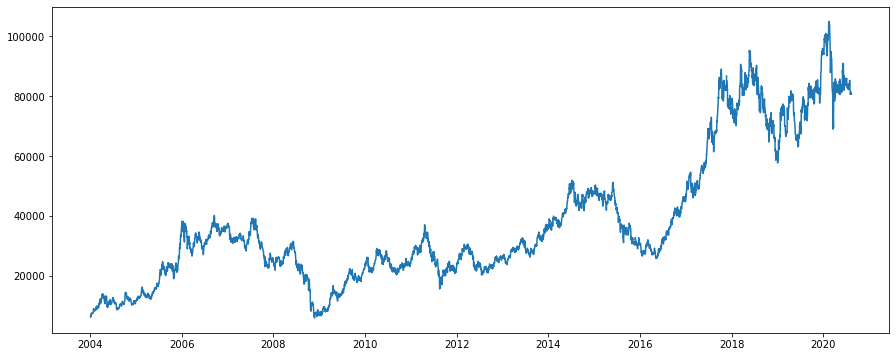

In [99]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

# time series 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts)

In [100]:
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

In [101]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts=ts.interpolate(method='time')
ts[ts.isna()]    # 다시 NaN 확인

Series([], Name: Close, dtype: float64)

In [102]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


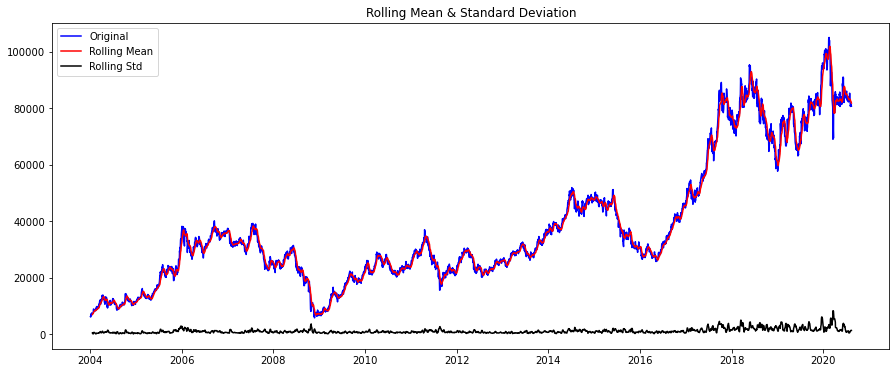

In [103]:
plot_rolling_statistics(ts, window=12)

In [104]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [105]:
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                   -0.869419
p-value                           0.797876
#Lags Used                       24.000000
Number of Observations Used    4118.000000
Critical Value (1%)              -3.431939
Critical Value (5%)              -2.862242
Critical Value (10%)             -2.567144
dtype: float64


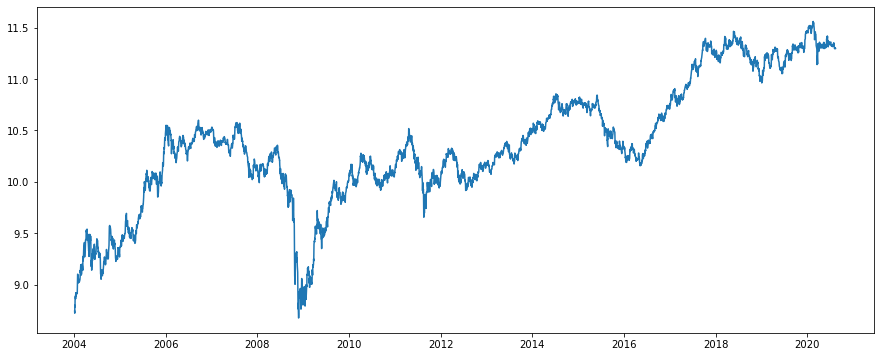

In [106]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [107]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -2.027835
p-value                           0.274503
#Lags Used                        8.000000
Number of Observations Used    4134.000000
Critical Value (1%)              -3.431933
Critical Value (5%)              -2.862239
Critical Value (10%)             -2.567142
dtype: float64


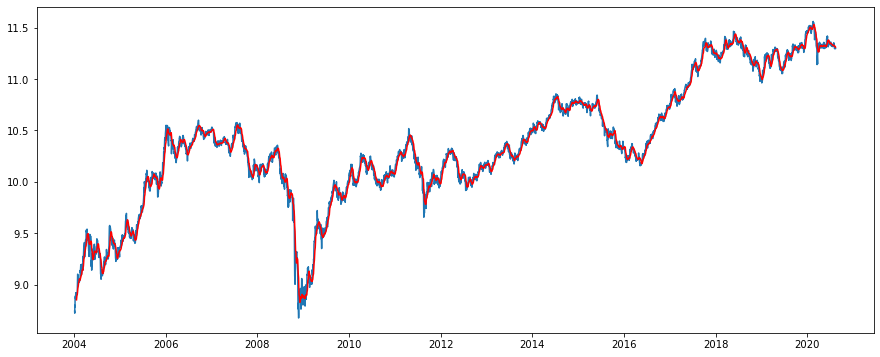

In [108]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average를 구해서 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [109]:
ts_log_moving_avg = ts_log - moving_avg
ts_log_moving_avg.head(15)

Date
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
2004-01-08         NaN
2004-01-09         NaN
2004-01-12         NaN
2004-01-13         NaN
2004-01-14         NaN
2004-01-15         NaN
2004-01-16         NaN
2004-01-19         NaN
2004-01-20    0.058469
2004-01-21    0.044394
2004-01-22    0.028704
2004-01-23    0.019422
Name: Close, dtype: float64

In [110]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2004-01-20    0.058469
2004-01-21    0.044394
2004-01-22    0.028704
2004-01-23    0.019422
2004-01-26    0.011217
2004-01-27    0.068023
2004-01-28    0.148981
2004-01-29    0.156153
2004-01-30    0.140085
2004-02-02    0.109927
2004-02-03    0.038800
2004-02-04    0.059986
2004-02-05    0.009479
2004-02-06    0.022630
2004-02-09    0.012857
Name: Close, dtype: float64

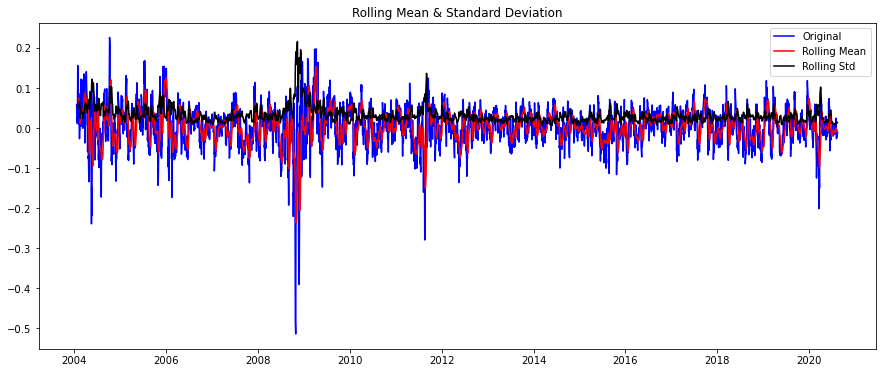

In [111]:
plot_rolling_statistics(ts_log_moving_avg)

In [112]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.331146e+01
p-value                        6.733451e-25
#Lags Used                     1.100000e+01
Number of Observations Used    4.120000e+03
Critical Value (1%)           -3.431938e+00
Critical Value (5%)           -2.862242e+00
Critical Value (10%)          -2.567144e+00
dtype: float64


In [113]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

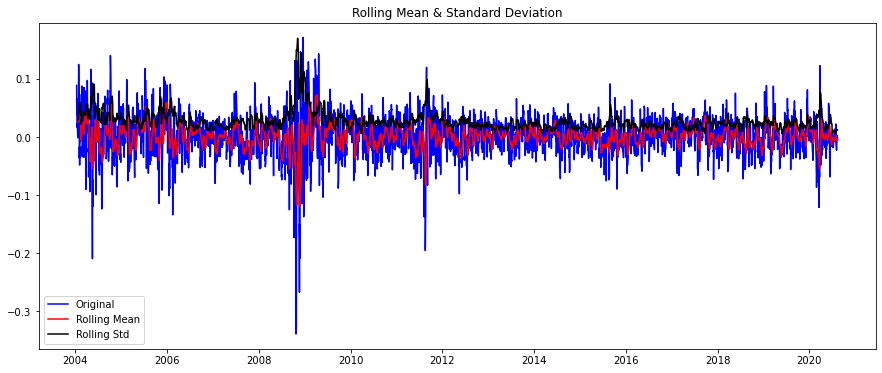

In [114]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [115]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                -1.159361e+01
p-value                        2.754112e-21
#Lags Used                     2.900000e+01
Number of Observations Used    4.108000e+03
Critical Value (1%)           -3.431943e+00
Critical Value (5%)           -2.862244e+00
Critical Value (10%)          -2.567145e+00
dtype: float64


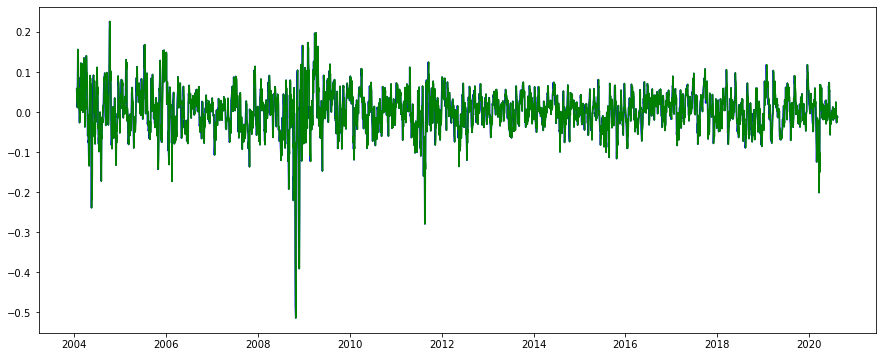

In [116]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

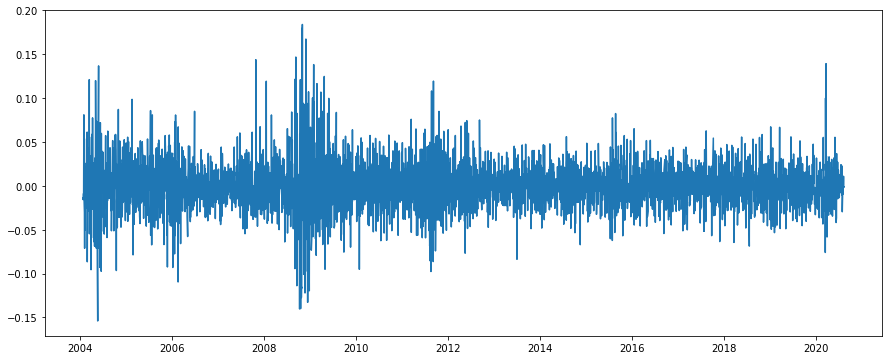

In [117]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

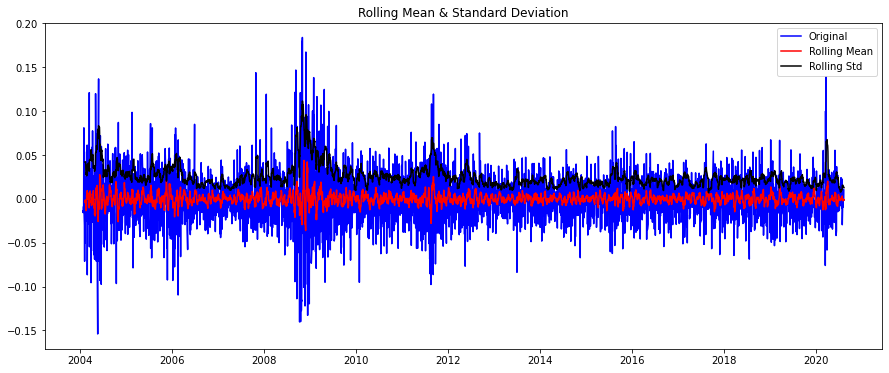

In [118]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [119]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.821964e+01
p-value                        2.381602e-30
#Lags Used                     3.100000e+01
Number of Observations Used    4.099000e+03
Critical Value (1%)           -3.431946e+00
Critical Value (5%)           -2.862245e+00
Critical Value (10%)          -2.567145e+00
dtype: float64


In [120]:
ts_log.head()

Date
2004-01-05    8.740337
2004-01-06    8.720950
2004-01-07    8.797851
2004-01-08    8.781095
2004-01-09    8.876265
Name: Close, dtype: float64

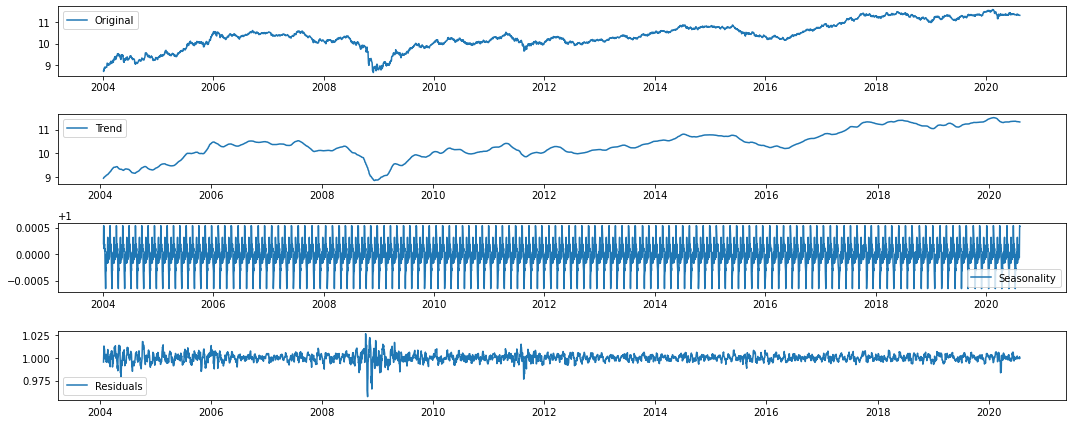

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


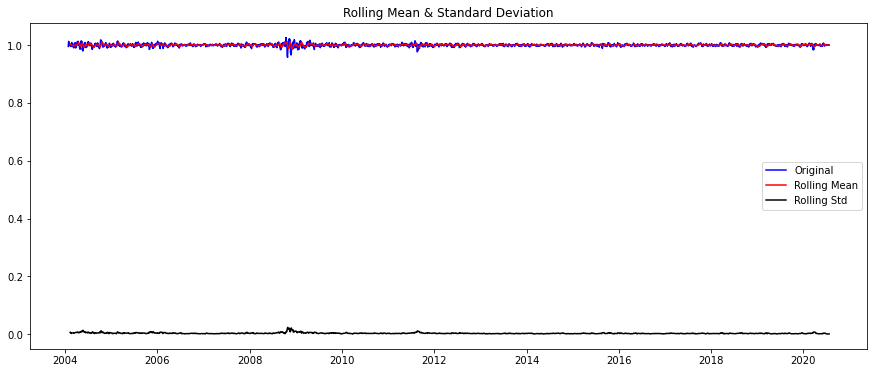

In [122]:
plot_rolling_statistics(residual)

In [123]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.682095e+01
p-value                        1.178422e-29
#Lags Used                     2.900000e+01
Number of Observations Used    4.083000e+03
Critical Value (1%)           -3.431953e+00
Critical Value (5%)           -2.862248e+00
Critical Value (10%)          -2.567147e+00
dtype: float64


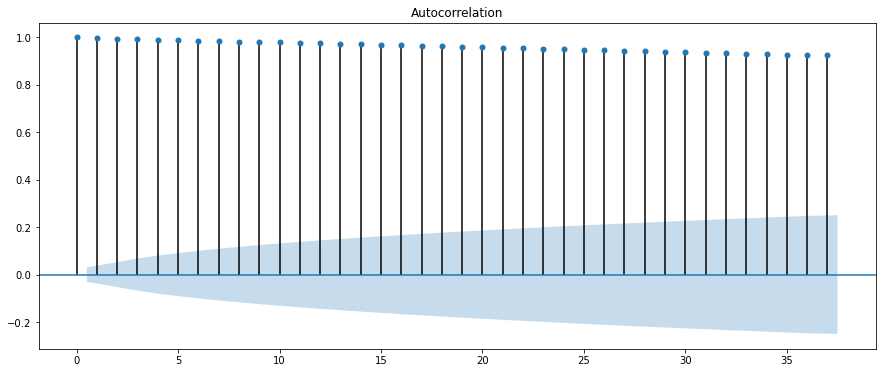

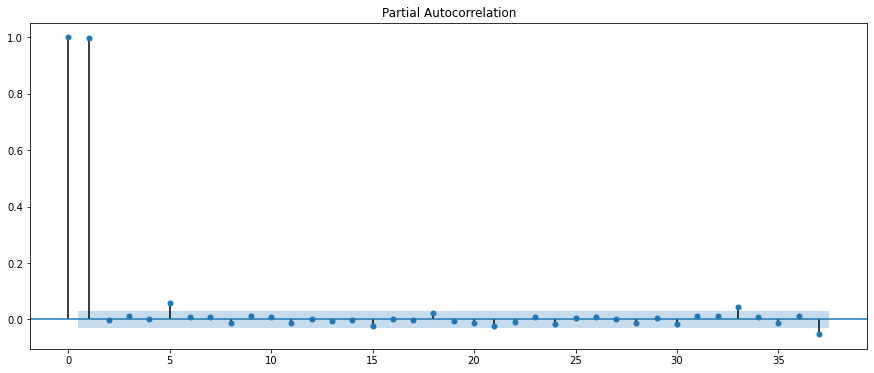

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.182417e+01
p-value                        8.278487e-22
#Lags Used                     3.100000e+01
Number of Observations Used    4.110000e+03
Critical Value (1%)           -3.431942e+00
Critical Value (5%)           -2.862243e+00
Critical Value (10%)          -2.567144e+00
dtype: float64


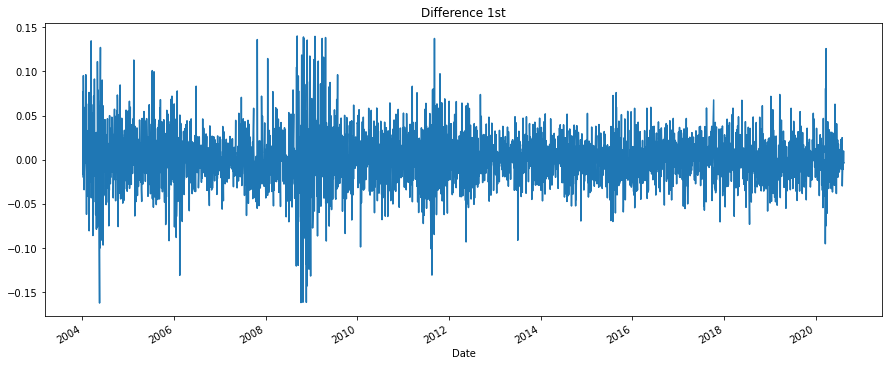

In [125]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.776651e+01
p-value                        3.321355e-30
#Lags Used                     3.100000e+01
Number of Observations Used    4.109000e+03
Critical Value (1%)           -3.431942e+00
Critical Value (5%)           -2.862244e+00
Critical Value (10%)          -2.567145e+00
dtype: float64


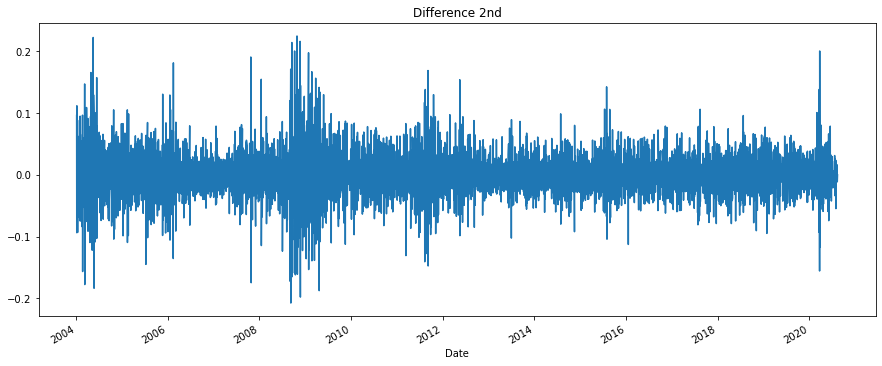

In [126]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

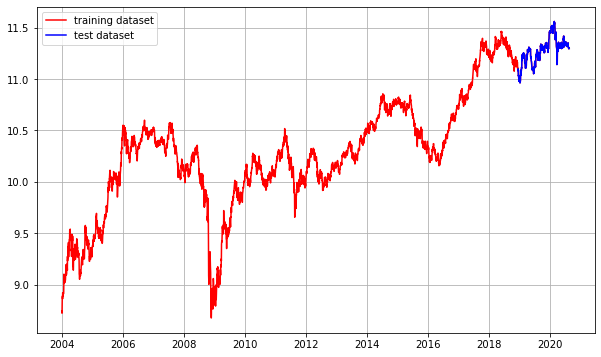

In [127]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [128]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2004-01-05    8.740337
2004-01-06    8.720950
Name: Close, dtype: float64
(3728,)
(415,)


In [129]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 8))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3727
Model:                 ARIMA(1, 1, 8)   Log Likelihood                7830.598
Method:                       css-mle   S.D. of innovations              0.030
Date:                Thu, 13 Aug 2020   AIC                         -15639.197
Time:                        17:05:11   BIC                         -15570.740
Sample:                             1   HQIC                        -15614.843
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.447      0.148      -0.000       0.001
ar.L1.D.Close     0.1309      0.319      0.410      0.682      -0.494       0.756
ma.L1.D.Close    -0.1343      0.319     

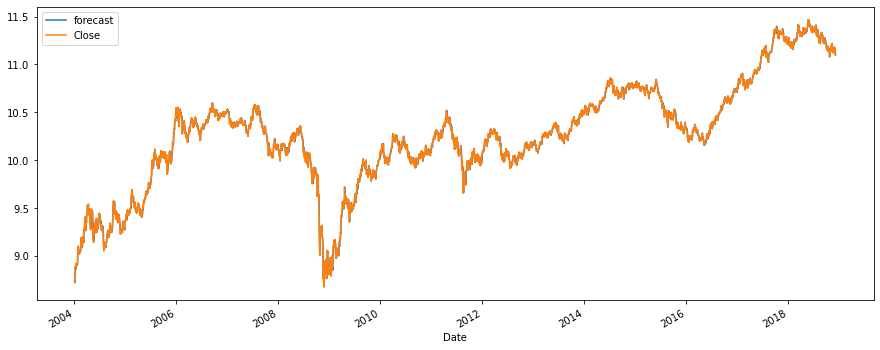

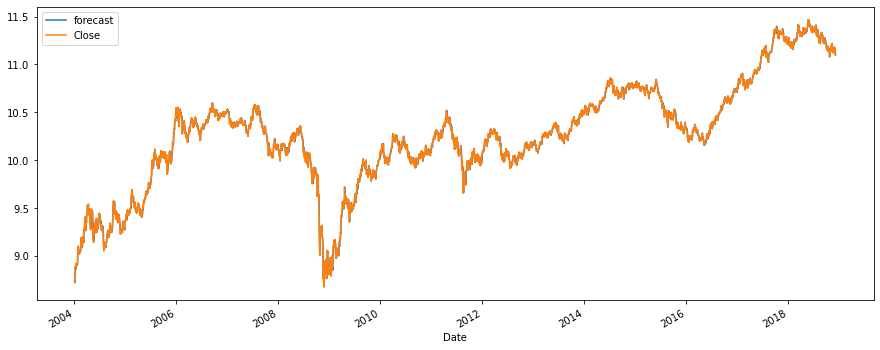

In [130]:
fitted_m.plot_predict()

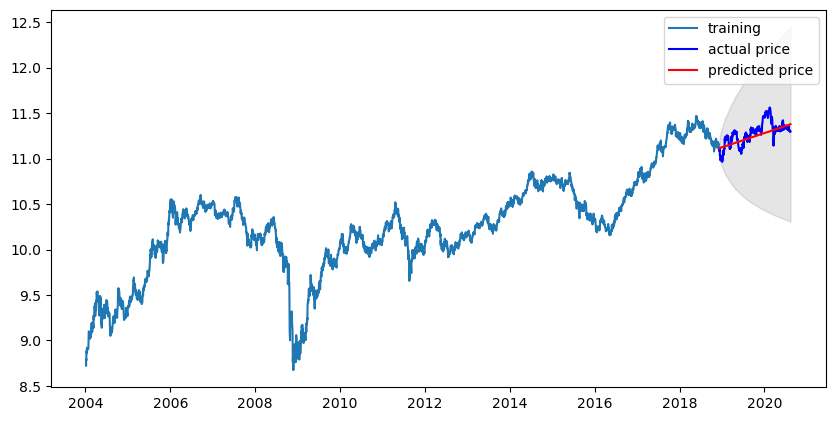

In [131]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  61438535.6331838
MAE:  5830.913915114841
RMSE:  7838.27376615437
MAPE: 7.06%


#skhynics도 대상 데이터를 2004년 이후로 변경 하여 mape를 증가 시켜으며 q=8로 진행시 더욱 향상 확인